In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')

In [59]:
train_df = pd.read_csv("datasets/train.csv")

In [60]:
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [61]:
train_df.columns = [column.lower() for column in train_df.columns]
train_df.columns = [column.replace(' ','_') for column in train_df.columns]

### Test Train Split

In [62]:
X = train_df.drop(columns = 'saleprice')
y = train_df[['saleprice','id']]

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

### Split DataFrame Based on Type of Feature

In [64]:
#split the data based on type to effectivly explore,impute,and encode if needed. Drop target featurer

#categorical features
numeric_train_df = X_train.select_dtypes(include = ['int','float']).sort_index()

#categorical features
categorical_train_df =  X_train.select_dtypes(include = ['object']).sort_index()

# Numeric Features

In [65]:
#remove ID and PID, put into own DF
id_train_df = numeric_train_df[['id','pid']]

numeric_train_df = numeric_train_df.drop(columns = ['id','pid'])


In [66]:
numeric_train_df.describe()

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,...,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
count,1538.000000,1285.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1520.000000,1537.000000,1537.000000,...,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,56.983095,69.378210,9955.676203,6.109883,5.559818,1971.860858,1984.168401,99.348026,443.889395,48.128822,...,472.576723,94.012354,47.527308,22.126138,2.618986,16.298440,2.569571,58.338101,6.177503,2007.776983
std,43.217246,24.095542,5427.477335,1.428502,1.100363,30.173843,20.926357,176.483877,469.196659,170.055633,...,218.266217,124.893497,66.927900,60.058850,26.147481,57.023537,38.947031,623.083653,2.698290,1.305238
min,20.000000,21.000000,1476.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7473.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,...,316.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9487.500000,6.000000,5.000000,1975.000000,1993.000000,0.000000,368.000000,0.000000,...,478.000000,0.000000,26.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11498.000000,7.000000,6.000000,2001.000000,2003.750000,160.000000,736.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,63887.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,870.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000


In [67]:
numeric_null = numeric_train_df.isna().sum().sort_values(ascending = False)
numeric_null[numeric_null > 0]

lot_frontage      253
garage_yr_blt      88
mas_vnr_area       18
bsmt_half_bath      2
bsmt_full_bath      2
total_bsmt_sf       1
bsmtfin_sf_1        1
bsmtfin_sf_2        1
bsmt_unf_sf         1
dtype: int64

#### Numeric categories that could mean 0 for NA


In [68]:
def na_0_filler(df,columns):
    for column in columns:
        df[column] = df[column].fillna(0)
    return df

In [69]:
#Linear feet of street connected to property
#reasonable to assume if na, zero feet of street connected to property 
numeric_train_df[['lot_frontage']]

#Year garage was built
#reasonable to assume if na, no garage
numeric_train_df[['garage_yr_blt']]

#Masonry veneer area in square feet
#reasonable to assume if na, no Masonry veneer
numeric_train_df[['mas_vnr_area']].describe()

numeric_na_0_columns = ['garage_yr_blt','mas_vnr_area','lot_frontage']

In [70]:
na_0_filler(numeric_train_df,[numeric_na_0_columns]).head()

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,...,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
0,60,0.0,13517,6,8,1976,2005,289.0,533.0,0.0,...,475.0,0,44,0,0,0,0,0,3,2010
1,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,...,559.0,0,74,0,0,0,0,0,4,2009
3,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,...,400.0,100,0,0,0,0,0,0,4,2010
4,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,...,484.0,0,59,0,0,0,0,0,3,2010
5,20,137.0,16492,6,6,1966,2002,0.0,247.0,713.0,...,578.0,0,0,0,0,0,0,0,6,2010


#### Numeric categories that could need inputer

In [71]:
imputer = SimpleImputer(strategy='median')

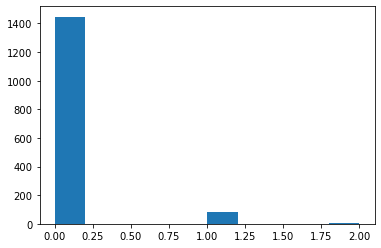

In [72]:
#all columns have 1-2 missing value, will use the median value to fill na values

#Basement half bathrooms
plt.hist(numeric_train_df['bsmt_half_bath'])

#Basement full bathrooms
numeric_train_df['bsmt_full_bath']

#Total square feet of basement area
numeric_train_df['total_bsmt_sf']

#Type 1 finished square feet
numeric_train_df['bsmtfin_sf_1']

#Type 2 finished square feet
numeric_train_df['bsmtfin_sf_2']

#Unfinished square feet of basement area
numeric_train_df['bsmt_unf_sf']

imputer_columns = ['bsmt_half_bath',
'bsmt_full_bath',
'total_bsmt_sf',
'bsmtfin_sf_1',
'bsmtfin_sf_2',
'bsmt_unf_sf']

In [73]:
numeric_train_df[imputer_columns] = imputer.fit_transform(numeric_train_df[imputer_columns])
numeric_train_df

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,...,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
0,60,0.0,13517,6,8,1976,2005,289.0,533.0,0.0,...,475.0,0,44,0,0,0,0,0,3,2010
1,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,...,559.0,0,74,0,0,0,0,0,4,2009
3,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,...,400.0,100,0,0,0,0,0,0,4,2010
4,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,...,484.0,0,59,0,0,0,0,0,3,2010
5,20,137.0,16492,6,6,1966,2002,0.0,247.0,713.0,...,578.0,0,0,0,0,0,0,0,6,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,60,110.0,13688,9,5,2003,2004,664.0,1016.0,0.0,...,726.0,400,0,0,0,0,0,0,3,2008
2042,50,45.0,8248,4,4,1922,1950,0.0,0.0,0.0,...,0.0,0,0,112,0,0,0,0,9,2006
2047,30,0.0,12342,4,5,1940,1950,0.0,262.0,0.0,...,539.0,158,0,0,0,0,0,0,3,2009
2049,20,80.0,10400,4,5,1956,1956,0.0,155.0,750.0,...,294.0,0,189,140,0,0,0,0,11,2009


## Standard Scalar

In [74]:
ss = StandardScaler()

In [75]:
scaled_numeric_train_df = ss.fit_transform(numeric_train_df,)
scaled_numeric_train_df = pd.DataFrame(scaled_numeric_train_df,index = numeric_train_df.index, columns=numeric_train_df.columns)

In [76]:
scaled_numeric_train_df

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,...,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
0,0.069831,-1.712103,0.656379,-0.076947,2.218337,0.137221,0.995796,1.085930,0.190149,-0.283011,...,0.011106,-0.752985,-0.052720,-0.368527,-0.100195,-0.285912,-0.065997,-0.093658,-1.177982,1.703704
1,0.069831,-0.442031,0.283156,0.623315,-0.508923,0.800262,0.613378,0.192440,0.411947,-0.283011,...,0.396082,-0.752985,0.395669,-0.368527,-0.100195,-0.285912,-0.065997,-0.093658,-0.807256,0.937311
3,0.069831,0.444066,-0.028324,-0.777209,-0.508923,1.131783,1.091400,-0.558774,-0.946565,-0.283011,...,-0.332623,0.047958,-0.710358,-0.368527,-0.100195,-0.285912,-0.065997,-0.093658,-0.807256,1.703704
4,-0.161634,0.709895,0.788712,-0.076947,2.218337,-2.382336,0.422170,-0.558774,-0.946565,-0.283011,...,0.052353,-0.752985,0.171474,-0.368527,-0.100195,-0.285912,-0.065997,-0.093658,-1.177982,1.703704
5,-0.856027,2.334407,1.204694,-0.076947,0.400164,-0.194300,0.852389,-0.558774,-0.419795,3.912354,...,0.483160,-0.752985,-0.710358,-0.368527,-0.100195,-0.285912,-0.065997,-0.093658,-0.065805,1.703704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,0.069831,1.536919,0.687896,2.023838,-0.508923,1.032327,0.947993,3.220061,1.220229,-0.283011,...,1.161452,2.450785,-0.710358,-0.368527,-0.100195,-0.285912,-0.065997,-0.093658,-1.177982,0.170919
2042,-0.161634,-0.382958,-0.314738,-1.477470,-1.418010,-1.652991,-1.633324,-0.558774,-0.946565,-0.283011,...,-2.165843,-0.752985,-0.710358,1.496917,-0.100195,-0.285912,-0.065997,-0.093658,1.046372,-1.361867
2047,-0.624563,-1.712103,0.439818,-1.477470,-0.508923,-1.056253,-1.633324,-0.558774,-0.387805,-0.283011,...,0.304421,0.512504,-0.710358,-0.368527,-0.100195,-0.285912,-0.065997,-0.093658,-1.177982,0.937311
2049,-0.856027,0.650822,0.081892,-1.477470,-0.508923,-0.525820,-1.346511,-0.558774,-0.616001,4.130066,...,-0.818426,-0.752985,2.114495,1.963278,-0.100195,-0.285912,-0.065997,-0.093658,1.787823,0.937311


In [77]:
#add id and PID back to numeric column
scaled_numeric_train_df = pd.concat([id_train_df,scaled_numeric_train_df], axis=1)

# Categorical Features

#### Ordinal Features

In [78]:
ordinal_columns = ['alley','utilities','land_slope','exter_qual',
       'bsmt_qual', 'bsmt_cond', 'bsmt_exposure','bsmtfin_type_1',
        'bsmtfin_type_2', 'heating_qc','electrical', 'kitchen_qual', 
        'functional','fireplace_qu', 'garage_finish', 'garage_qual',
        'garage_cond', 'paved_drive', 'pool_qc', 'fence'] 

In [79]:
ordinal_train_df = categorical_train_df[ordinal_columns]
ordinal_train_df.head()

,alley,utilities,land_slope,exter_qual,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating_qc,electrical,kitchen_qual,functional,fireplace_qu,garage_finish,garage_qual,garage_cond,paved_drive,pool_qc,fence
0,NaN,AllPub,Gtl,Gd,TA,TA,No,GLQ,Unf,Ex,SBrkr,Gd,Typ,NaN,RFn,TA,TA,Y,NaN,NaN
1,NaN,AllPub,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,SBrkr,Gd,Typ,TA,RFn,TA,TA,Y,NaN,NaN
3,NaN,AllPub,Gtl,TA,Gd,TA,No,Unf,Unf,Gd,SBrkr,TA,Typ,NaN,Fin,TA,TA,Y,NaN,NaN
4,NaN,AllPub,Gtl,TA,Fa,Gd,No,Unf,Unf,TA,SBrkr,TA,Typ,NaN,Unf,TA,TA,N,NaN,NaN
5,NaN,AllPub,Gtl,Gd,TA,TA,No,ALQ,Rec,Ex,SBrkr,Gd,Mod,Gd,Fin,TA,TA,Y,NaN,NaN


In [80]:
ordinal_null = ordinal_train_df.isna().sum().sort_values(ascending = False)
ordinal_null[ordinal_null > 0]

pool_qc           1531
alley             1427
fence             1225
fireplace_qu       765
garage_qual         88
garage_cond         88
garage_finish       88
bsmt_exposure       43
bsmtfin_type_2      41
bsmt_cond           40
bsmtfin_type_1      40
bsmt_qual           40
dtype: int64

#### Ordinal categories that could mean 0 for NA

In [81]:
#Pool quality, na means (0)
ordinal_train_df['pool_qc']

#Type of alley access to property, if na means no access (0)
ordinal_train_df['alley']

#Fence quality, na means (0)
ordinal_train_df['fence']

#Fireplace quality, na means (0)
ordinal_train_df['fireplace_qu']

# Garage quality,  na means (0)
ordinal_train_df['garage_qual']

# Garage condition,  na means (0)
ordinal_train_df['garage_cond']

# Interior finish of the garage,  na means (0)
ordinal_train_df['garage_finish']

# Refers to walkout or garden level walls, na means (0)
ordinal_train_df['bsmt_exposure']

#Rating of basement finished area (if multiple types)t, na means (0)
ordinal_train_df['bsmtfin_type_2']

#Evaluates the general condition of the basement, na means (0)
ordinal_train_df['bsmt_cond']

#Rating of basement finished area, na means (0)
ordinal_train_df['bsmtfin_type_1']

#Evaluates the height of the basement, na means (0)
ordinal_train_df['bsmt_qual']    

ordinal_na_0_columns = ordinal_null[ordinal_null > 0].index

In [82]:
na_0_filler(ordinal_train_df,ordinal_na_0_columns)

,alley,utilities,land_slope,exter_qual,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating_qc,electrical,kitchen_qual,functional,fireplace_qu,garage_finish,garage_qual,garage_cond,paved_drive,pool_qc,fence
0,0,AllPub,Gtl,Gd,TA,TA,No,GLQ,Unf,Ex,SBrkr,Gd,Typ,0,RFn,TA,TA,Y,0,0
1,0,AllPub,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,SBrkr,Gd,Typ,TA,RFn,TA,TA,Y,0,0
3,0,AllPub,Gtl,TA,Gd,TA,No,Unf,Unf,Gd,SBrkr,TA,Typ,0,Fin,TA,TA,Y,0,0
4,0,AllPub,Gtl,TA,Fa,Gd,No,Unf,Unf,TA,SBrkr,TA,Typ,0,Unf,TA,TA,N,0,0
5,0,AllPub,Gtl,Gd,TA,TA,No,ALQ,Rec,Ex,SBrkr,Gd,Mod,Gd,Fin,TA,TA,Y,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,0,AllPub,Gtl,Gd,Ex,TA,Av,GLQ,Unf,Ex,SBrkr,Ex,Typ,Gd,Fin,TA,TA,Y,0,0
2042,Grvl,AllPub,Gtl,TA,TA,TA,No,Unf,Unf,TA,SBrkr,TA,Typ,Gd,0,0,0,N,0,0
2047,0,AllPub,Gtl,TA,TA,TA,No,BLQ,Unf,Ex,SBrkr,TA,Typ,0,Unf,TA,TA,Y,0,0
2049,0,AllPub,Gtl,TA,TA,TA,No,Rec,LwQ,TA,SBrkr,TA,Typ,Gd,Unf,TA,TA,Y,0,0


## Nominal Features

In [83]:
nominal_train_df = categorical_train_df.drop(columns = ordinal_columns)
nominal_train_df.head()

,ms_zoning,street,lot_shape,land_contour,lot_config,neighborhood,condition_1,condition_2,bldg_type,house_style,...,exterior_1st,exterior_2nd,mas_vnr_type,exter_cond,foundation,heating,central_air,garage_type,misc_feature,sale_type
0,RL,Pave,IR1,Lvl,CulDSac,Sawyer,RRAe,Norm,1Fam,2Story,...,HdBoard,Plywood,BrkFace,TA,CBlock,GasA,Y,Attchd,NaN,WD
1,RL,Pave,IR1,Lvl,CulDSac,SawyerW,Norm,Norm,1Fam,2Story,...,VinylSd,VinylSd,BrkFace,TA,PConc,GasA,Y,Attchd,NaN,WD
3,RL,Pave,Reg,Lvl,Inside,Timber,Norm,Norm,1Fam,2Story,...,VinylSd,VinylSd,None,TA,PConc,GasA,Y,BuiltIn,NaN,WD
4,RL,Pave,IR1,Lvl,Inside,SawyerW,Norm,Norm,1Fam,1.5Fin,...,Wd Sdng,Plywood,None,TA,PConc,GasA,Y,Detchd,NaN,WD
5,RL,Pave,IR1,Lvl,Corner,NAmes,PosA,Norm,1Fam,1Story,...,BrkFace,Plywood,None,TA,CBlock,GasA,Y,Attchd,NaN,WD


In [84]:
nominal_null = nominal_train_df.isna().sum().sort_values(ascending = False)
nominal_null[nominal_null > 0]

misc_feature    1484
garage_type       88
mas_vnr_type      18
dtype: int64

#### Nominal categories that could mean 0 for NA

In [85]:
#Miscellaneous feature not covered in other categories, na means 0
nominal_train_df['misc_feature']

#Garage location, na means 0
nominal_train_df['garage_type']

#Masonry veneer type, it could be none but was put in as na. Na will mean 0
nominal_train_df['mas_vnr_type'].isna().sum()

nominal_na_0_columns = nominal_null[nominal_null > 0].index

In [86]:
na_0_filler(nominal_train_df,nominal_na_0_columns)

,ms_zoning,street,lot_shape,land_contour,lot_config,neighborhood,condition_1,condition_2,bldg_type,house_style,...,exterior_1st,exterior_2nd,mas_vnr_type,exter_cond,foundation,heating,central_air,garage_type,misc_feature,sale_type
0,RL,Pave,IR1,Lvl,CulDSac,Sawyer,RRAe,Norm,1Fam,2Story,...,HdBoard,Plywood,BrkFace,TA,CBlock,GasA,Y,Attchd,0,WD
1,RL,Pave,IR1,Lvl,CulDSac,SawyerW,Norm,Norm,1Fam,2Story,...,VinylSd,VinylSd,BrkFace,TA,PConc,GasA,Y,Attchd,0,WD
3,RL,Pave,Reg,Lvl,Inside,Timber,Norm,Norm,1Fam,2Story,...,VinylSd,VinylSd,None,TA,PConc,GasA,Y,BuiltIn,0,WD
4,RL,Pave,IR1,Lvl,Inside,SawyerW,Norm,Norm,1Fam,1.5Fin,...,Wd Sdng,Plywood,None,TA,PConc,GasA,Y,Detchd,0,WD
5,RL,Pave,IR1,Lvl,Corner,NAmes,PosA,Norm,1Fam,1Story,...,BrkFace,Plywood,None,TA,CBlock,GasA,Y,Attchd,0,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,RL,Pave,IR1,Lvl,Inside,NridgHt,Norm,Norm,1Fam,2Story,...,VinylSd,VinylSd,BrkFace,TA,PConc,GasA,Y,BuiltIn,0,WD
2042,RL,Pave,Reg,Lvl,Inside,Edwards,Norm,Norm,1Fam,1.5Fin,...,Wd Sdng,Wd Sdng,None,TA,BrkTil,GasA,N,0,0,COD
2047,RL,Pave,IR1,Lvl,Inside,Edwards,Norm,Norm,1Fam,1Story,...,VinylSd,VinylSd,None,TA,CBlock,GasA,Y,Detchd,0,WD
2049,RL,Pave,Reg,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,...,Plywood,Plywood,None,TA,CBlock,GasA,Y,Attchd,0,WD


## Encoding Ordinal Features

### Ordinal Dictionary

In [87]:
ordinal_col_list = ordinal_train_df.columns
print(ordinal_col_list)

Index(['alley', 'utilities', 'land_slope', 'exter_qual', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2',
       'heating_qc', 'electrical', 'kitchen_qual', 'functional',
       'fireplace_qu', 'garage_finish', 'garage_qual', 'garage_cond',
       'paved_drive', 'pool_qc', 'fence'],
      dtype='object')


In [88]:
ordinal_dict = [
    
#Alley
{'Grvl':2,'Pave':1,0:0},
#Utilities
{'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1},
#Land Slope
{'Gtl':3,'Mod':2,'Sev':1},
#Exter Qual
{'Ex':5,'Gd':4, 'TA':3, 'Fa':2,'Po':1},     
#Bsmt Qual
{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,0:0},
#Bsmt Cond
{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,0:0},
#Bsmt Exposure
{'Gd':4,'Av':3,'Mn':2,'No':1,0:0},
#BsmtFin Type 1
{'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,0:0},
#BsmtFinType 2
{'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,0:0},
#HeatingQC 
{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
#Electrical
{'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1},
#KitchenQual
{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
#Functional
{'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1},
#FireplaceQu
{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,0:0},
#Garage Finish
{'Fin':3,'RFn':2,'Unf':1,0:0},
#Garage Qual
{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,0:0},
#Garage Cond
{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,0:0},
#Paved Drive
{'Y':3,'P':2,'N':1},
#Pool QC
{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,0:0},
#Fence
{'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,0:0}

]

In [89]:
#zip column names to dictionary values
named_ordinal_dict = dict(zip(ordinal_col_list,ordinal_dict))

In [90]:
def ordinal_replace(df,columns):
    for column in columns:
        df[column] = df[column].map(named_ordinal_dict[column])
    return df

In [91]:
#replace categorty value with values
encoded_ordinal_train_df = ordinal_replace(ordinal_train_df, ordinal_train_df.columns)

In [92]:
encoded_ordinal_train_df.describe()

,alley,utilities,land_slope,exter_qual,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating_qc,electrical,kitchen_qual,functional,fireplace_qu,garage_finish,garage_qual,garage_cond,paved_drive,pool_qc,fence
count,1538.000000,1538.0,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,0.116385,4.0,2.948635,3.401170,3.493498,2.934330,1.611834,3.589077,1.262679,4.139142,4.881014,3.514304,7.842003,1.730169,1.719116,2.798440,2.806242,2.828349,0.014304,0.607932
std,0.437482,0.0,0.240556,0.583596,0.894003,0.570568,1.068647,2.128026,0.925275,0.974704,0.415404,0.667191,0.685668,1.802734,0.897716,0.732868,0.726960,0.542701,0.218954,1.243482
min,0.000000,4.0,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,4.0,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,3.000000,5.000000,3.000000,8.000000,0.000000,1.000000,3.000000,3.000000,3.000000,0.000000,0.000000
50%,0.000000,4.0,3.000000,3.000000,4.000000,3.000000,1.000000,4.000000,1.000000,5.000000,5.000000,3.000000,8.000000,1.000000,2.000000,3.000000,3.000000,3.000000,0.000000,0.000000
75%,0.000000,4.0,3.000000,4.000000,4.000000,3.000000,2.000000,6.000000,1.000000,5.000000,5.000000,4.000000,8.000000,4.000000,2.000000,3.000000,3.000000,3.000000,0.000000,0.000000
max,2.000000,4.0,3.000000,5.000000,5.000000,5.000000,4.000000,6.000000,6.000000,5.000000,5.000000,5.000000,8.000000,5.000000,3.000000,5.000000,5.000000,3.000000,4.000000,4.000000


### Encoding Nominal Features

In [93]:
#all 0 values replaced from NA should be dropped when encoded.
dummies_nominal_train_df = pd.get_dummies(nominal_train_df, drop_first=True)

In [94]:
dummies_nominal_train_df.describe()

,ms_zoning_C (all),ms_zoning_FV,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,land_contour_HLS,...,misc_feature_Shed,misc_feature_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,...,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,0.009103,0.054616,0.007802,0.775033,0.152146,0.996749,0.024057,0.004551,0.630689,0.042913,...,0.029909,0.000650,0.005202,0.001300,0.008453,0.001951,0.001300,0.075423,0.001951,0.868661
std,0.095004,0.227304,0.088014,0.417697,0.359279,0.056943,0.153277,0.067332,0.482775,0.202727,...,0.170392,0.025499,0.071957,0.036049,0.091578,0.044137,0.036049,0.264158,0.044137,0.337881
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Combine all dataframes back to one and save

In [95]:
#numerical, ordinal, and nominal data frames created earlier
dataframes = [scaled_numeric_train_df,encoded_ordinal_train_df,dummies_nominal_train_df]

In [96]:
#combine on index
cleaned_train_data = pd.concat(dataframes, axis=1)

In [97]:
#combine target back to cleaned dataframe on ID
final_train_df = pd.merge(cleaned_train_data,y_train, on = 'id')

In [98]:
#write new cleaned and encoded dataframes
cleaned_train_data.to_csv('datasets/cleaned_Xtrain_data.csv',index=False)
y_train.to_csv('datasets/cleaned_ytrain_data.csv',index=False)

In [99]:
final_train_df.to_csv('datasets/final_train_df.csv',index=False)